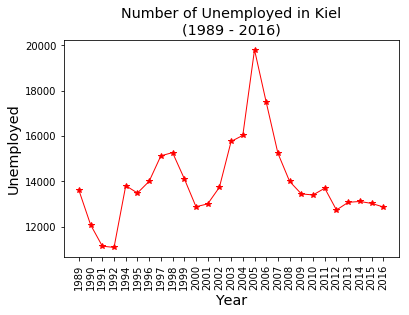

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd

DATA_FILE = "data/kiel_arbeitslose.xlsx"

# Read Excel data
def read_excel_file(filename):
    book = xlrd.open_workbook(filename, encoding_override = "utf-8")
    sheet = book.sheet_by_index(0)
    x_data = np.asarray([sheet.cell(i, 0).value for i in range(1, sheet.nrows)])
    y_data = np.asarray([sheet.cell(i, 1).value for i in range(1, sheet.nrows)])
    return x_data, y_data

x_data, y_data = read_excel_file(DATA_FILE)

# Create a Pandas Dataframe
df = pd.DataFrame({'x':x_data, 'y':y_data})

# print the first five rows
# print(df.head())

df_cleaned = df.dropna(how='all')
df_years = df_cleaned['x'].astype(np.uint16)

x = df_years.values
y = df_cleaned['y'].values  # no value for 1993

fig, ax = plt.subplots()

plt.title("Number of Unemployed in Kiel\n(1989 - 2016)", size="x-large")
plt.ylabel("Unemployed", size="x-large")
plt.xlabel("Year", size="x-large")

plt.plot(y, "r*-", markersize=6, linewidth=1, color='r')

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation='vertical')

plt.show()